In [1194]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

# Data Collection from kaggle

In [1195]:
df = pd.read_csv("C://Users//dyordanov02/DS/train.csv")

In [1196]:
# Checking what the columns are of the df
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [1197]:
new_data = np.random.randint(1,100, size=len(df))
df_2 = pd.DataFrame(new_data, columns=['Quantity'])
df.insert(loc=17, column='Quantity', value=new_data)

In [1198]:
price_per_each = df['Sales']/df['Quantity']
df.insert(loc=18, column='Price', value=price_per_each)

In [1199]:
df.tail(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Quantity,Price,Sales
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,53,4.437509,235.188
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Mi...,31,0.850839,26.376
9799,9800,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-AC-10000487,Technology,Accessories,SanDisk Cruzer 4 GB U...,20,0.519200,10.384


In [1200]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Quantity,Price,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collect...,95,2.757474,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,Hon Deluxe Fabric Uph...,25,29.277600,731.94
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address...,24,0.609167,14.62



# Data Cleaning

**Drop rows that are not numberes in column 'Quantity Ordered'**

In [1201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Quantity       9800 non-null   int32  
 18  Price   

In [1202]:
df[df["Order ID"].isna()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Quantity,Price,Sales


In [1203]:
df.isna().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Quantity          0
Price             0
Sales             0
dtype: int64

In [1204]:
# Drop the na values from anywhere in the df
df = df.dropna()

In [1205]:
df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Quantity         0
Price            0
Sales            0
dtype: int64

**Dataset Information**

In [1206]:
# Time Related
df['Order Date'] = pd.to_datetime(df['Order Date'])

df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Day'] = df['Order Date'].dt.day
df['Count'] = 1


C:\Users\dyordanov02\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/04/2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\dyordanov02\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '22/11/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\dyordanov02\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13/05/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\dyordanov02\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '27/08/2015' in DD/MM/YYYY format. 

In [1207]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Quantity,Price,Sales,Year,Month,Day,Count
0,1,CA-2017-152156,2017-08-11,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collect...,95,2.757474,261.96,2017,8,11,1
1,2,CA-2017-152156,2017-08-11,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,Hon Deluxe Fabric Uph...,25,29.277600,731.94,2017,8,11,1
2,3,CA-2017-138688,2017-12-06,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address...,24,0.609167,14.62,2017,12,6,1


# Exploratory Data Analysis

**Best 20 selling products**

In [1208]:
most_sold = df.groupby('Product Name')['Sales'].sum()
most_sold.nlargest(20)

Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.8240
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.3840
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.4800
HON 5400 Series Task Chairs for Big and Tall                                   21870.5760
GBC DocuBind TL300 Electric Binding System                                     19823.4790
GBC Ibimaster 500 Manual ProClick Binding System                               19024.5000
Hewlett Packard LaserJet 3310 Copier                                           18839.6860
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18374.8950
GBC DocuBind P400 Electric Binding System                                      17965.0680
High Speed Automatic Electric Letter Opener                                    17030.3120
Lexmark MX611dhe Monochrome Laser Printer                                      16829.90

In [1209]:
most_sold.describe()

count     1848.000000
mean      1218.943405
std       2762.241672
min          1.624000
25%         96.707500
50%        299.973000
75%       1184.082000
max      61599.824000
Name: Sales, dtype: float64

**Most sold by Segment**

In [1210]:
most_sold_segment = df.groupby('Segment')['Sales'].mean()
most_sold_segment

Segment
Consumer       225.021223
Corporate      231.415141
Home Office    242.800818
Name: Sales, dtype: float64

**Most and worst sold by city and zip code**

In [1211]:
most_sold_city = df.groupby('City')['Sales'].sum()
most_sold_city.nlargest(5)

City
New York City    252462.547
Los Angeles      173420.181
Seattle          116106.322
San Francisco    109041.120
Philadelphia     108841.749
Name: Sales, dtype: float64

In [1212]:
most_sold_city.nsmallest(5)

City
Abilene         1.392
Elyria          1.824
Jupiter         2.064
Pensacola       2.214
Ormond Beach    2.808
Name: Sales, dtype: float64

In [1213]:
most_sold_zip = df.groupby('Postal Code')['Sales'].sum()
most_sold_zip.nlargest(10)

Postal Code
10024.0    78534.044
10035.0    75151.829
10009.0    53225.076
94122.0    49114.375
10011.0    45551.598
98105.0    41838.008
98115.0    41160.908
19134.0    39390.293
32216.0    39133.328
90049.0    37889.924
Name: Sales, dtype: float64

In [1214]:
most_sold_zip.nsmallest(10)

Postal Code
79605.0    1.392
44035.0    1.824
33458.0    2.064
32503.0    2.214
32174.0    2.808
93405.0    3.620
98208.0    3.856
98002.0    4.180
72762.0    4.300
84041.0    4.960
Name: Sales, dtype: float64

**Worst 20 selling products**

In [1215]:
most_sold.nsmallest(20)

Product Name
Eureka Disposable Bags for Sanitaire Vibra Groomer I Upright Vac               1.624
Avery 5                                                                        5.760
Xerox 20                                                                       6.480
Grip Seal Envelopes                                                            7.072
Acme Serrated Blade Letter Opener                                              7.632
Avery Hi-Liter Pen Style Six-Color Fluorescent Set                             7.700
Avery Hi-Liter Comfort Grip Fluorescent Highlighter, Yellow Ink                7.800
Xerox 1989                                                                     7.968
Stockwell Gold Paper Clips                                                     8.096
Acco Economy Flexible Poly Round Ring Binder                                   8.352
Newell 308                                                                     8.400
Avery 484                                           

**Mean sale per product**

In [1216]:
mean_sale_per_product = df.groupby('Product Name')['Sales'].mean()
mean_sale_per_product.nlargest(10)

Product Name
Cisco TelePresence System EX90 Videoconferencing Unit                    22638.480000
Canon imageCLASS 2200 Advanced Copier                                    12319.964800
Cubify CubeX 3D Printer Triple Head Print                                 7999.980000
3D Systems Cube Printer, 2nd Generation, Magenta                          7149.945000
HP Designjet T520 Inkjet Large Format Printer - 24" Color                 6124.965000
High Speed Automatic Electric Letter Opener                               5676.770667
Ibico EPK-21 Electric Binding System                                      5291.972000
Lexmark MX611dhe Monochrome Laser Printer                                 4207.475250
Canon imageCLASS MF7460 Monochrome Digital Laser Multifunction Copier     3991.980000
Okidata MB760 Printer                                                     3917.200000
Name: Sales, dtype: float64

In [1217]:
mean_sale_per_product.nsmallest(10)

Product Name
Eureka Disposable Bags for Sanitaire Vibra Groomer I Upright Vac              1.6240
Maxell 4.7GB DVD+R 5/Pack                                                     2.3364
Hoover Replacement Belt for Commercial Guardsman Heavy-Duty Upright Vacuum    2.4420
Computer Printout Index Tabs                                                  2.7720
Acco Economy Flexible Poly Round Ring Binder                                  2.7840
OIC Binder Clips, Mini, 1/4" Capacity, Black                                  3.1248
Insertable Tab Indexes For Data Binders                                       3.4980
Avery Reinforcements for Hole-Punch Pages                                     3.5640
Storex Flexible Poly Binders with Double Pockets                              3.6080
Maxell 4.7GB DVD-R 5/Pack                                                     3.8016
Name: Sales, dtype: float64

**What was the best month for sales**

In [1218]:
best_month_sales = df.groupby('Month').sum()
best_month_sales

,Row ID,Postal Code,Quantity,Price,Sales,Year,Day,Count
Month,,,,,,,,
1,2611710,30570122.0,27362,7767.825388,153681.4254,1145523,7965,568
2,2875207,29921448.0,26486,7094.794813,131153.2594,1081070,6263,536
3,4012279,44455972.0,40504,21277.632225,212256.1344,1607385,12199,797
4,3177354,37439522.0,33610,6588.646103,142984.2481,1393571,10624,691
5,4191608,42535287.0,40415,9682.151574,165795.7167,1647663,13164,817
6,3223734,36578388.0,33664,8703.613434,140740.0213,1377412,10865,683
7,3741513,40050611.0,36168,9645.743196,158757.3865,1458097,11479,723
8,3829554,46959708.0,39674,9225.924720,203196.8939,1609355,12766,798
9,5426652,58796584.0,57433,16490.384840,245155.0671,2250607,19014,1116


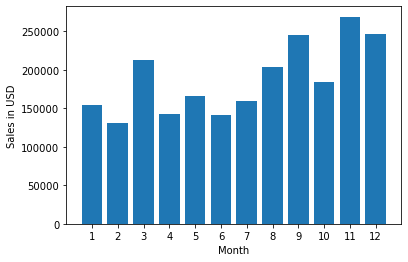

In [1219]:
months = range(1,13)
plt.bar(months, best_month_sales['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD')
plt.xlabel('Month')
plt.show()

**What region had the highest number of sales**

In [1220]:
highest_city_number_sale = df.groupby('Region').sum()
highest_city_number_sale

,Row ID,Postal Code,Quantity,Price,Sales,Year,Month,Day,Count
Region,,,,,,,,,
Central,11230808,149080099.0,114669,25806.112779,492646.9132,4592082,16351,36417,2277
East,13359251,48903058.0,138015,44381.287925,660589.3560,5594425,19948,44322,2774
South,7995925,55117795.0,78463,31740.505863,389151.4590,3222661,11164,25407,1598
West,15347867,287969601.0,158672,36545.759299,710219.6845,6332539,22928,51639,3140


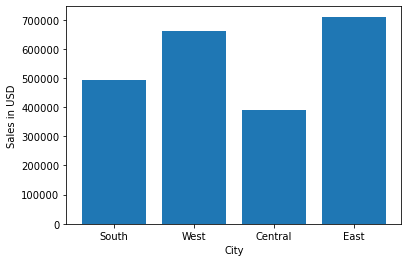

In [1221]:
region = df['Region'].unique()

plt.bar(region, highest_city_number_sale['Sales'])
plt.xticks(region, size=10)
plt.ylabel('Sales in USD')
plt.xlabel('City')
plt.show()

**Sales Trend over Years**

In [1222]:
# Getting starting date
df['Order Date'].min()

Timestamp('2015-01-02 00:00:00')

In [1223]:
# Getting end date
df['Order Date'].max()

Timestamp('2018-12-30 00:00:00')

In [1224]:
# Getting the month year from the df
df['month-year'] = df['Order Date'].apply(lambda x: x.strftime('%Y-%m'))

In [1225]:
#Grouping the month year
df_trend_sales = df.groupby('month-year').sum()['Sales'].reset_index()

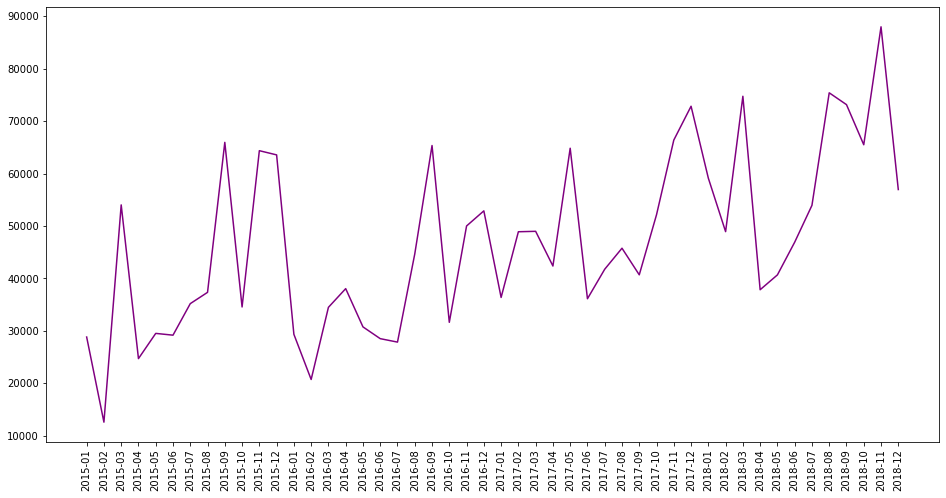

In [1226]:
# Setting and plotting the figure
plt.figure(figsize=(16,8))
plt.plot(df_trend_sales['month-year'],df_trend_sales['Sales'], color='purple')
plt.xticks(rotation='vertical')
plt.show()

In [1227]:
product_sales = pd.DataFrame(df.groupby('Product Name').sum()['Sales'])

In [1228]:
product_sales = product_sales.sort_values('Sales',ascending=False)

In [1229]:
product_sales[0:10]

,Sales
Product Name,
Canon imageCLASS 2200 Advanced Copier,61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,27453.384
Cisco TelePresence System EX90 Videoconferencing Unit,22638.480
HON 5400 Series Task Chairs for Big and Tall,21870.576
GBC DocuBind TL300 Electric Binding System,19823.479
GBC Ibimaster 500 Manual ProClick Binding System,19024.500
Hewlett Packard LaserJet 3310 Copier,18839.686
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",18374.895
GBC DocuBind P400 Electric Binding System,17965.068


C:\Users\dyordanov02\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


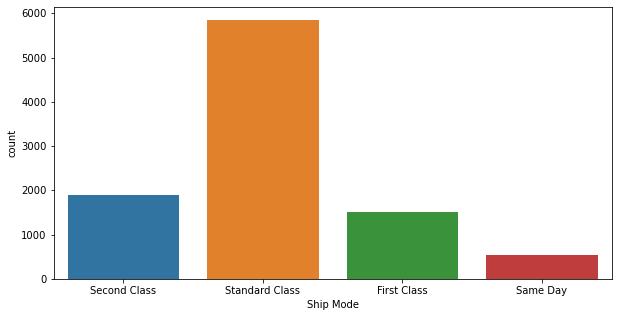

In [1230]:
plt.figure(figsize=(10,5))
sns.countplot(df['Ship Mode'])
plt.show()

C:\Users\dyordanov02\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


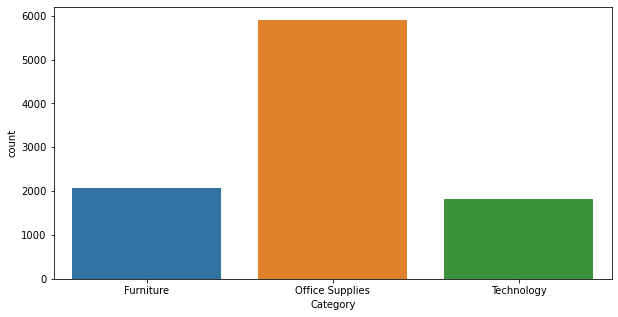

In [1231]:
plt.figure(figsize=(10,5))
sns.countplot(df['Category'])

plt.show()

C:\Users\dyordanov02\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


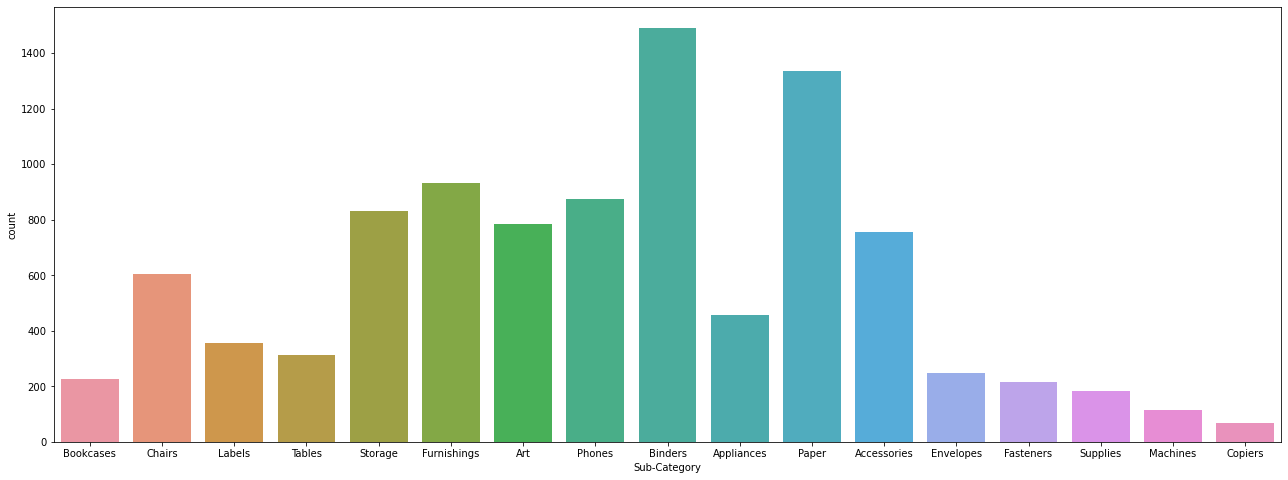

In [1232]:
sub_category = df['Sub-Category']
plt.figure(figsize=(22,8))

sns.countplot(df['Sub-Category'])
plt.show()